In [126]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import math
import pandas as pd
housing = pd.read_csv('./kc_house_data.csv')
housing.head(5)



,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [127]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


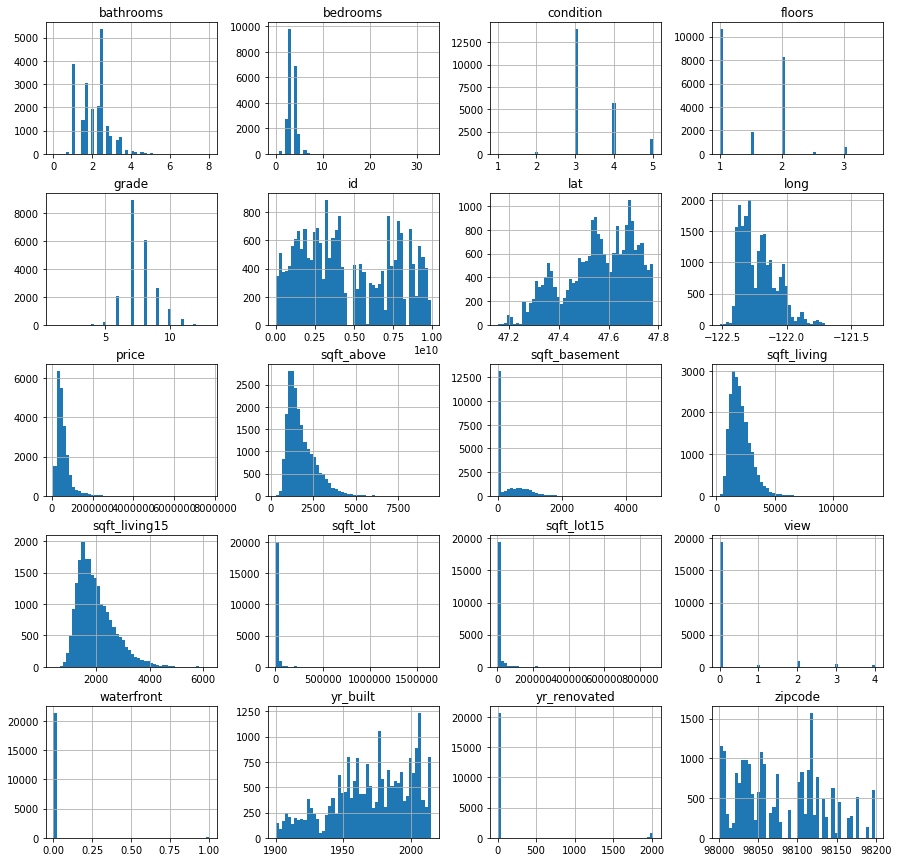

In [128]:
housing.hist(bins=50, figsize=(15,15))
plt.show()

In [129]:

housing.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [130]:
corr_matrix = housing.corr()
corr_matrix["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

In [134]:
housing["price"] = np.log(housing["price"])
housing["sqft_living"] = np.log(housing["sqft_living"])
housing["sqft_lot"] = np.log(housing["sqft_lot"])
housing["sqft_above"] = np.log(housing["sqft_above"])
housing.describe()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,2.567813,3.370842,2.114757,7.550335,8.989956,1.494309,0.007542,0.234303,3.409430,7.656873,7.394877,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,0.040115,0.930062,0.770163,0.424807,0.902425,0.539989,0.086517,0.766318,0.650743,1.175459,0.427631,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,2.418165,0.000000,0.000000,5.669881,6.253829,1.000000,0.000000,0.000000,1.000000,1.000000,5.669881,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,2.540196,3.000000,1.750000,7.263330,8.525161,1.000000,0.000000,0.000000,3.000000,7.000000,7.081709,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,2.566256,3.000000,2.250000,7.554859,8.938269,1.500000,0.000000,0.000000,3.000000,7.000000,7.352441,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,2.593537,4.000000,2.500000,7.843849,9.276877,2.000000,0.000000,0.000000,4.000000,8.000000,7.700748,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,2.763594,33.000000,8.000000,9.513404,14.317109,3.500000,1.000000,4.000000,5.000000,13.000000,9.149528,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [132]:
corr_matrix = housing.corr()
corr_matrix["price"].sort_values(ascending=False)

price            1.000000
grade            0.703634
sqft_living      0.695341
sqft_living15    0.619312
sqft_above       0.601801
bathrooms        0.550802
lat              0.449174
view             0.346522
bedrooms         0.343561
sqft_basement    0.316970
floors           0.310558
waterfront       0.174586
yr_renovated     0.114498
sqft_lot         0.099622
sqft_lot15       0.091592
yr_built         0.080655
long             0.049942
condition        0.039558
id              -0.003819
zipcode         -0.038306
Name: price, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f80387188d0>,
      dtype=object)

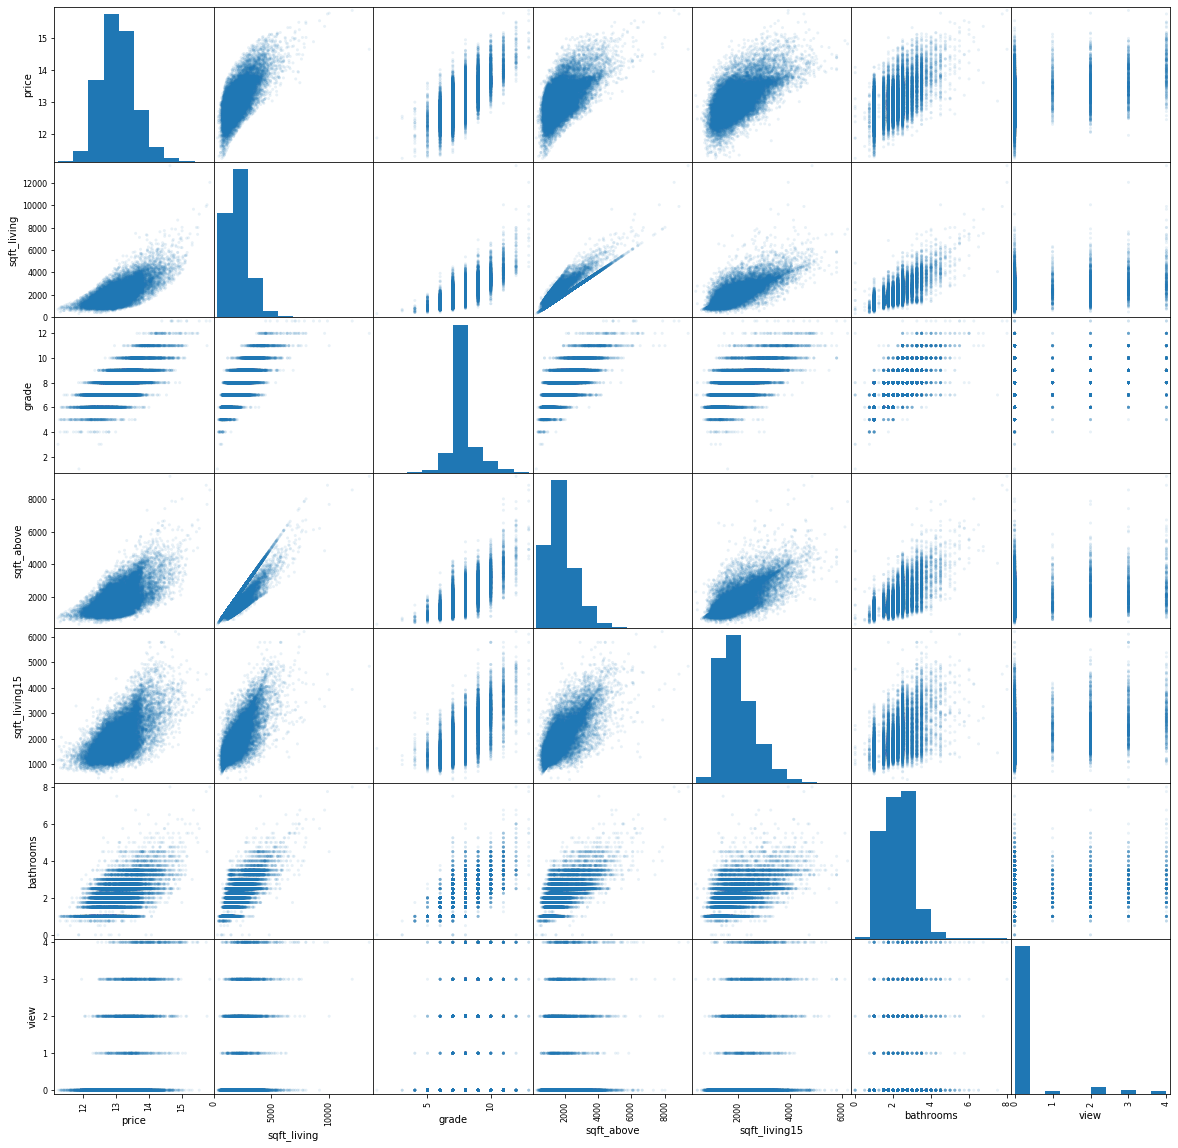

In [133]:
from pandas.plotting import scatter_matrix
attributes = ["price", "sqft_living", "grade", "sqft_above","sqft_living15","bathrooms", "view" ]
scatter_matrix(housing[attributes], figsize=(20, 20), alpha=0.1)


Used features = sqft_living, grade, sqft_above, sqft_living15, bathrooms, view,sqft_basement, bedrooms, lat, waterfront, floors, yr_renovated, and sqft_lot

price            1.000000
grade            0.703634
sqft_living      0.674913
sqft_living15    0.619312
sqft_above       0.586303
bathrooms        0.550802
lat              0.449174
view             0.346522
bedrooms         0.343561
sqft_basement    0.316970
floors           0.310558
waterfront       0.174586
sqft_lot         0.137727


Unused features:
id, date, price, condition, yr_built, zipcode,long, sqft_lot15

In [113]:
from sklearn.model_selection import train_test_split
housing_labels = housing["price"]

# used_features = ["sqft_living", "grade", "sqft_above", "sqft_living15", "bathrooms", "view" ,"sqft_basement", "bedrooms", "lat", "waterfront", "floors", "yr_renovated", "sqft_lot"]
# housing_features = housing[used_features]
housing_features = housing.drop(["id", "date", "price", "condition", "zipcode", "long"], axis =1)
train_set_x, test_set_x, train_set_y, test_set_y  = train_test_split(housing_labels, housing_features, test_size=0.2, random_state=42)
print(len(train_set_x), "train +", len(test_set_x), "test")

17290 train + 4323 test


In [114]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_set_y, train_set_x)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

All right, we have a linear regressor trained, let's see some sample results

In [115]:

print("Predictions:", lin_reg.predict(test_set_y))
print("Labels:", list(test_set_x))

Predictions: [12.93031136 13.41031906 14.03259827 ... 12.71672014 13.0982151
 12.72409568]
Labels: [12.80765263256463, 13.670484785914017, 13.852806342707972, 14.214286677921642, 13.474427708785377, 12.259613412458204, 13.579788224443204, 13.42984807715229, 12.859699067927835, 13.312983737012978, 13.366093562326927, 12.86099861326992, 12.072541252905651, 12.80765263256463, 11.982929094215963, 13.883169206438088, 13.592367006650065, 13.58625712930572, 12.779873068457553, 13.068962600677214, 13.091904169919621, 13.742939865129438, 13.732128949025222, 13.235692062711331, 13.390862630439337, 13.215853720491667, 12.577636201962656, 12.524526376648708, 12.706817629953214, 13.527828485512494, 12.959844447906553, 13.151922179645874, 13.312983737012978, 12.429216196844383, 12.706847933442663, 13.799381176034391, 13.626164386233356, 13.091904169919621, 12.631340380934517, 14.452087387035824, 13.149978544437301, 12.55183374958996, 12.641096555879882, 12.89921982609012, 12.644327576461329, 12.4419

These seem fairly close, looks promising. Let's see what the mean squared error is


In [116]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(test_set_y)
lin_mse = mean_squared_error(np.exp(test_set_x), np.exp(housing_predictions))
lin_rmse = np.sqrt(lin_mse)
lin_rmse

288540.9257561186

- Ok, now we have a baseline for how the linear regressor works. So far not that great with a mean squared error of over $21,000. 
- Next is to train a random forest of regressors and average them together. 

In [117]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(train_set_y, train_set_x)

housing_predictions = forest_reg.predict(test_set_y)
forest_mse = mean_squared_error(np.exp(test_set_x), np.exp(housing_predictions))
forest_rmse = np.sqrt(forest_mse)
forest_rmse


171754.8132279461

Hey! Looks like this better.

##Fine Tune my model
Let's try a grid search to tune some hyperparamets in my random forest regressor


In [87]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (4×3) combinations of hyperparameters
    {'n_estimators': [40, 50, 60, 70], 'max_features': [4, 6, 8]},
    # then try 9 (3x3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [40, 50, 60], 'max_features': [ 4, 6, 8]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+9)*5=105 rounds of training. It's going to take a while
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(train_set_y, train_set_x)

KeyboardInterrupt: ignored

In [118]:
grid_search.best_params_

AttributeError: ignored

Based on this, our best parameters for RF regressor would be 'max_features': 6,  n_estimators': 60

In [119]:
forest_reg = RandomForestRegressor(n_estimators=50, max_features=6, random_state=42)
forest_reg.fit(train_set_y, train_set_x)

housing_predictions = forest_reg.predict(test_set_y)
forest_mse = mean_squared_error(np.exp(test_set_x), np.exp(housing_predictions))
forest_rmse = np.sqrt(forest_mse)
forest_rmse

169956.58573642466

In [120]:
from sklearn.metrics import explained_variance_score
print(explained_variance_score((test_set_x), (housing_predictions)))

0.8641014307367595
